core        WARNING 	Ergast API lookup failed. The session is very recent and not yet available or does not exist.
core        WARNING 	Ergast API lookup failed. The session is very recent and not yet available or does not exist.
core           INFO 	Loading laps for Qatar Grand Prix - Race [v2.1.11]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['44', '10', '14', '4', '77', '55', '33', '22', '31', '5', '11', '18', '16', '3', '63', '7', '6', '99', '47', '9']
/home/frank/.local/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy

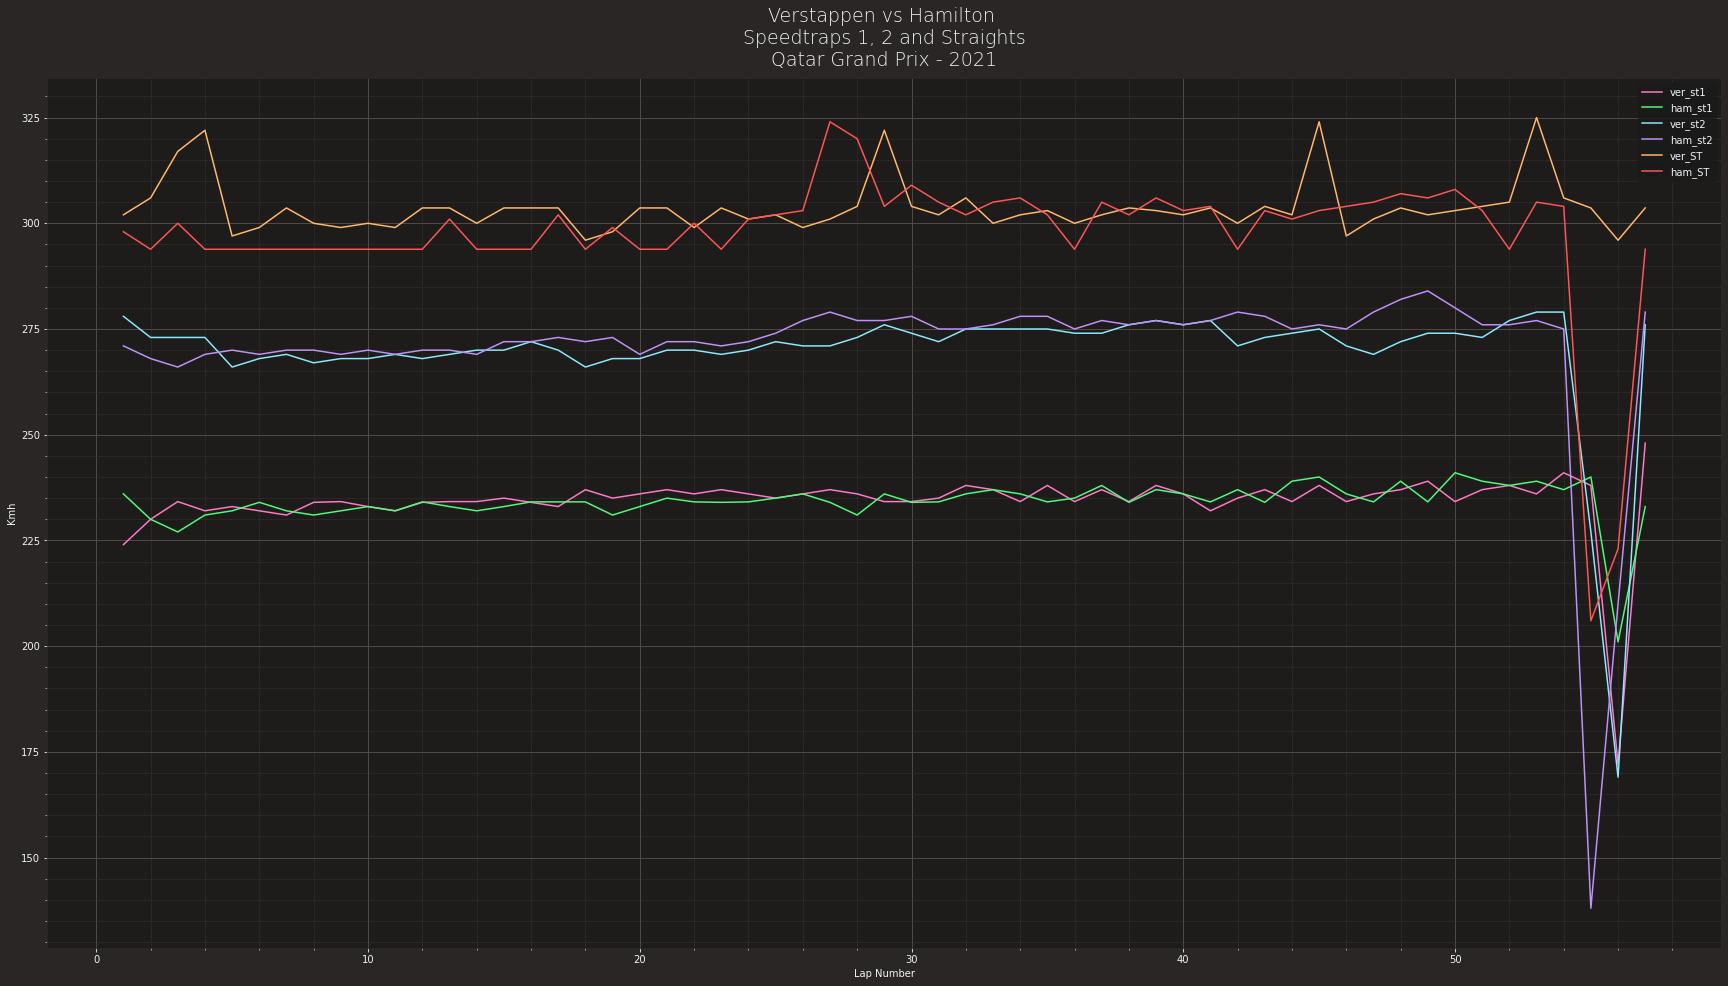

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
#
plotting.setup_mpl()
#
ff1.Cache.enable_cache('cache')
#
# getting Qatar last weekend
#
session =ff1.get_session(2021,'Qatar', 'R')
race = ff1.get_session(2021,'Qatar', 'R').load_laps()
#
# getting the laps from verstappen and hamilton
#
ver_ham = race.pick_drivers(['HAM', 'VER'])
#
# each in their own dataframe
#
verlaps=ver_ham.pick_driver('VER')
hamlaps=ver_ham.pick_driver('HAM')
#
# only interested in certain columns
#
ver_speedtraps=verlaps[['LapNumber','Driver','SpeedI1','SpeedI2','SpeedFL','SpeedST']]
ham_speedtraps=hamlaps[['LapNumber','Driver','SpeedI1','SpeedI2','SpeedFL','SpeedST']]
#
# fill missing values - determine mean values first
#
ver_meanst1=ver_speedtraps['SpeedI1'].mean()
ver_meanst2=ver_speedtraps['SpeedI2'].mean()
ver_meanst3=ver_speedtraps['SpeedFL'].mean()
ver_meanst4=ver_speedtraps['SpeedST'].mean()

#
ham_meanst1=ham_speedtraps['SpeedI1'].mean()
ham_meanst2=ham_speedtraps['SpeedI2'].mean()
ham_meanst3=ham_speedtraps['SpeedFL'].mean()
ham_meanst4=ham_speedtraps['SpeedST'].mean()

#
ver_speedtraps['SpeedI1'].fillna(ver_meanst1, inplace=True)
ver_speedtraps['SpeedI2'].fillna(ver_meanst2, inplace=True)
ver_speedtraps['SpeedFL'].fillna(ver_meanst3, inplace=True)
ver_speedtraps['SpeedST'].fillna(ver_meanst4, inplace=True)

#
ham_speedtraps['SpeedI1'].fillna(ham_meanst1, inplace=True)
ham_speedtraps['SpeedI2'].fillna(ham_meanst2, inplace=True)
ham_speedtraps['SpeedFL'].fillna(ham_meanst3, inplace=True)
ham_speedtraps['SpeedST'].fillna(ham_meanst3, inplace=True)

#
# Take out last rows
#
#ver_speedtraps.drop(ver_speedtraps.tail(3).index,inplace=True) # drop last n rows
#ham_speedtraps.drop(ham_speedtraps.tail(3).index,inplace=True) # drop last n rows
#
# next step is to contcatenate both dataframes for the excel sheet
#
all_speedtraps=ver_speedtraps.join(ham_speedtraps.set_index('LapNumber'), 
                                   on='LapNumber',lsuffix="_ver", rsuffix="_ham")
#
# so far so good
# now write the DF to an excel sheet
#
all_speedtraps.to_excel(r'speedtraps_qatar.xlsx', index = False, header = True)
#
# And finally lets plot per Speedtrap
#
fig, ax = plt.subplots(figsize=(30,16))
ax.plot(ver_speedtraps['LapNumber'], ver_speedtraps['SpeedI1'])
ax.plot(ham_speedtraps['LapNumber'], ham_speedtraps['SpeedI1'])
ax.plot(ver_speedtraps['LapNumber'], ver_speedtraps['SpeedI2'])
ax.plot(ham_speedtraps['LapNumber'], ham_speedtraps['SpeedI2'])
ax.plot(ver_speedtraps['LapNumber'], ver_speedtraps['SpeedST'])
ax.plot(ham_speedtraps['LapNumber'], ham_speedtraps['SpeedST'])


ax.set_title(
    f"Verstappen vs Hamilton \n"
             f"Speedtraps 1, 2 and Straights\n"
             f"{session.weekend.name} - {session.weekend.year}"
            )
ax.set_xlabel("Lap Number")
ax.set_ylabel("Kmh")
plt.legend(['ver_st1','ham_st1', 'ver_st2', 'ham_st2','ver_ST','ham_ST' ])

